In [1]:
# 以下のtrainデータから特長量を作成し、学習モデルを生成させる。
# /mnt/c/Users/hayat/Desktop/keiba_analysis/data_for_train/train/2005_2022

In [2]:
!pip install lightGBM

In [3]:
# /mnt/c/Users/hayat/Desktop/keiba_analysis/data_for_train/train/2005_2022
# のデータを取り込む
from pathlib import Path
import warnings
from sklearn.svm import SVC, LinearSVC
from sklearn import multiclass
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_sample_weight
import scipy.stats
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import tqdm
# 指定したディレクトリ配下のcsvデータをreadする
train_path = '/home/hayato/keiba_analysis/data_for_train/train/2005_2022/train_data__sorted2005_2022.csv'
# def read_csv_data(train_path):
#     # csvデータを読み込み、1行にまとめる
#     p = Path(train_path)
#     files = list(p.glob("*.csv"))
#     df = pd.DataFrame()
#     for i, file in tqdm.tqdm(enumerate(files)):
#         race_csv_data = pd.read_csv(file, encoding='utf-8')
#         # 各CSVファイルのデータを1行にまとめる
#         race_csv_data = race_csv_data.sum(axis=0).to_frame().T
        
#         # データフレームに追加
#         df = pd.concat([df, race_csv_data], ignore_index=True)
#         if i > 1:
#             # データが多すぎるため、一旦100個で
#             break
#     return df
train_data = pd.read_csv(train_path, encoding='utf-8')

print("train data length {}".format(len(train_data)))

train data length 61212


In [4]:
train_data

,Unnamed: 0,target_no1_umaban,date,race_name,place,class_list_in_race,number_of_horses,distance,condition,horse_name_0,...,horse_name_17,umaban_17,horse_age_17,horse_sex_17,horse_weight_17,weight_change_17,handi_17,jocky_17,odds_17,goal_number_17
0,0,5,253,2歳未勝利,",1回札幌1日目",",2歳未勝利",10,1500,",芝",シゲルダイノウカイ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,253,3歳未勝利,",1回札幌1日目",",3歳未勝利",12,1000,",ダ",アルディラ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,13,253,3歳未勝利,",1回札幌1日目",",3歳未勝利",13,1700,",ダ",ピリカヌプリ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,253,2歳新馬,",1回札幌1日目",",2歳新馬",13,1200,",芝",ジーティーライダー,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,12,253,3歳未勝利,",1回札幌1日目",",3歳未勝利",16,2000,",芝",キクノプリベイル,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61207,61207,8,6479,3歳以上1勝クラス,",4回小倉8日目",",3歳以上1勝クラス",11,1000,",ダ",エイブルマン,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61208,61208,18,6479,宗像特別,",4回小倉8日目",",3歳以上2勝クラス",18,1200,",芝",メイショウハボタン,...,エイシンスポッター,18.0,3.0,0.0,488.0,4.0,55.0,角田大河,6.0,1.0
61209,61209,6,6479,西日本スポーツ杯,",4回小倉8日目",",3歳以上3勝クラス",14,1700,",ダ",タイセイアゲイン,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61210,61210,1,6479,第42回小倉2歳ステークス(G3),",4回小倉8日目",",2歳オープン",13,1200,",芝",ロンドンプラン,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_data.describe()

,Unnamed: 0,target_no1_umaban,date,number_of_horses,distance,umaban_0,horse_age_0,horse_sex_0,horse_weight_0,weight_change_0,...,odds_16,goal_number_16,umaban_17,horse_age_17,horse_sex_17,horse_weight_17,weight_change_17,handi_17,odds_17,goal_number_17
count,61212.000000,61212.000000,61212.000000,61212.000000,61212.000000,61212.0,61212.000000,61212.000000,61212.000000,61212.000000,...,6150.000000,6150.000000,5159.0,5159.000000,5159.00000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,30605.500000,7.624387,3268.154006,14.256045,1662.448785,1.0,3.650771,0.450827,469.645347,0.283408,...,91.618081,9.900813,18.0,3.433805,0.56697,460.733669,0.449700,54.625993,90.006997,9.984881
std,17670.526676,4.355046,1868.463161,2.585601,442.142268,0.0,1.366517,0.569362,37.270968,6.500493,...,124.515784,5.137078,0.0,1.223806,0.54935,38.679202,6.683835,1.560845,122.406098,5.315170
min,0.000000,1.000000,35.000000,4.000000,1000.000000,1.0,2.000000,0.000000,-18.000000,-41.000000,...,1.200000,1.000000,18.0,2.000000,0.00000,-11.000000,-39.000000,48.000000,1.200000,1.000000
25%,15302.750000,4.000000,1653.000000,13.000000,1300.000000,1.0,3.000000,0.000000,450.000000,-4.000000,...,12.300000,5.000000,18.0,3.000000,0.00000,442.000000,-4.000000,54.000000,12.000000,5.000000
50%,30605.500000,7.000000,3260.000000,15.000000,1700.000000,1.0,3.000000,0.000000,470.000000,0.000000,...,37.200000,10.000000,18.0,3.000000,1.00000,462.000000,0.000000,54.000000,36.000000,10.000000
75%,45908.250000,11.000000,4887.000000,16.000000,1800.000000,1.0,4.000000,1.000000,490.000000,4.000000,...,120.875000,14.000000,18.0,4.000000,1.00000,480.000000,4.000000,56.000000,118.050000,15.000000
max,61211.000000,18.000000,6500.000000,18.000000,4260.000000,1.0,13.000000,2.000000,604.000000,48.000000,...,998.600000,18.000000,18.0,10.000000,2.00000,586.000000,36.000000,59.000000,908.000000,18.000000


In [6]:
# train_dataの特長量のobject型は、LabelEncoderで数値に変換する
# object型の特長量を確認する
object_columns = train_data.select_dtypes(include='object').columns
object_columns
for column in object_columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])

In [7]:
# columnの名前を確認し、:や 、"、'がある場合は_に置き換える
train_data.columns = train_data.columns.str.replace(":", "_")
train_data.columns = train_data.columns.str.replace(",", "_")
train_data.columns = train_data.columns.str.replace("'", "_")
train_data.columns = train_data.columns.str.replace('"', "_")
train_data.columns = train_data.columns.str.replace(" ", "_")


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61212 entries, 0 to 61211
Columns: 189 entries, Unnamed__0 to goal_number_17
dtypes: float64(120), int64(69)
memory usage: 88.3 MB


In [35]:
# 学習データが大きすぎるので、train_dataの上から1000行を取得して学習データとする
train_data = train_data[:300]
train_data

,Unnamed__0,target_no1_umaban,date,race_name,place,class_list_in_race,number_of_horses,distance,condition,horse_name_0,...,horse_name_17,umaban_17,horse_age_17,horse_sex_17,horse_weight_17,weight_change_17,handi_17,jocky_17,odds_17,goal_number_17
0,0,5,253,22,67,4,10,1500,1,12099,...,4751,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN,NaN
1,1,4,253,31,67,17,12,1000,0,1609,...,4751,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN,NaN
2,2,13,253,31,67,17,13,1700,0,24907,...,4751,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN,NaN
3,3,3,253,21,67,3,13,1200,1,14068,...,4751,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN,NaN
4,4,12,253,31,67,17,16,2000,1,6518,...,4751,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,8,226,29,130,14,12,1000,0,20872,...,4751,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN,NaN
296,296,2,226,3813,130,9,16,1200,1,4040,...,4751,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN,NaN
297,297,14,226,3691,130,14,14,1800,1,13152,...,4751,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN,NaN
298,298,11,226,3937,130,9,13,1700,0,8775,...,4751,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN,NaN


In [10]:
# train_dataを7:3でテストデータに分ける
from sklearn.model_selection import train_test_split
# テストデータと学習データ分割
train_total,test_total = train_test_split(train_data, test_size=0.3, random_state=42)

In [11]:
y = train_total['target_no1_umaban']
train_total.drop('target_no1_umaban', axis=1, inplace=True)

In [12]:
y_test_true = test_total['target_no1_umaban']
test_total.drop('target_no1_umaban', axis=1, inplace=True)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(train_total, y, test_size=0.2, random_state=42)

train data length 168
valid data length 42
test data length 90
train data length 168
valid data length 42
test data length 90


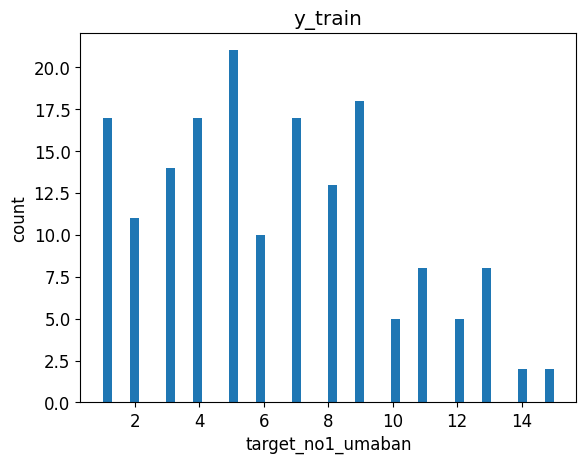

273    2
255    1
87     7
198    7
190    8
      ..
296    2
265    9
268    7
243    9
236    5
Name: target_no1_umaban, Length: 168, dtype: int64


In [46]:
# 学習データ、検証データ、テストデータの割り振りが完了したので、それぞれのデータ数を表示する
print("train data length {}".format(len(X_train)))
print("valid data length {}".format(len(X_valid)))
print("test data length {}".format(len(test_total)))
# 回答データについても、同様にデータ数を表示する
print("train data length {}".format(len(y_train)))
print("valid data length {}".format(len(y_valid)))
print("test data length {}".format(len(y_test_true)))

# 回答データのヒストグラムを表示する
# 横軸をすべての番号で表示する
f, (ax) = plt.subplots()
ax.hist(y_train, bins=50)
ax.set_title('y_train')
ax.set_xlabel('target_no1_umaban')
ax.set_ylabel('count')

plt.show()

print(y_train)


In [14]:
import lightgbm as lgb
from sklearn.utils.class_weight import compute_sample_weight
dtrain = lgb.Dataset(X_train, label=y_train)  # 学習用
dvalid = lgb.Dataset(X_valid, label=y_valid)  # early_stopping用
# precisionの向上には重みづけが有効
# dtrain = lgb.Dataset(X_train, label=y_train, weight=compute_sample_weight(class_weight='balanced', y=y_train).astype('float32'))
# dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)
# https://qiita.com/Dixhom/items/fd78f461d038798a7e2e
# fobj=fobjというハイパラもある？
print(compute_sample_weight(class_weight='balanced', y=y_train).astype('float32'))
print(np.ones(len(X_valid)).astype('float32'))

[1.0181818  0.65882355 0.65882355 0.65882355 0.86153847 0.62222224
 0.8        0.65882355 0.53333336 0.65882355 0.53333336 0.62222224
 0.53333336 0.86153847 0.65882355 0.8        0.53333336 1.4
 0.65882355 1.0181818  0.86153847 0.65882355 0.65882355 0.62222224
 2.24       0.65882355 0.53333336 1.4        5.6        1.12
 0.8        1.0181818  0.65882355 0.8        1.0181818  1.4
 1.0181818  0.53333336 0.86153847 1.12       0.8        0.86153847
 0.65882355 1.4        0.62222224 1.4        5.6        0.53333336
 5.6        0.65882355 1.4        1.0181818  0.62222224 0.65882355
 2.24       0.65882355 0.65882355 0.65882355 0.86153847 0.53333336
 1.12       0.65882355 0.65882355 0.65882355 0.62222224 2.24
 0.65882355 0.65882355 0.8        0.86153847 1.4        0.65882355
 0.8        0.53333336 1.0181818  0.65882355 0.65882355 5.6
 0.8        1.12       0.62222224 0.65882355 1.4        0.65882355
 0.65882355 1.4        0.53333336 0.65882355 1.4        0.8
 0.65882355 0.86153847 0.53333336 0

In [15]:
# feature_names = dtrain.feature_name
# clean_feature_names = [name.replace(' ', '_').replace(':', '_').replace('"', '_').replace("'", '_') for name in feature_names]
# # データセットに新しい特徴量名を設定
# dtrain.feature_name = clean_feature_names
# dvalid.feature_name = clean_feature_names

In [16]:
learning_rate = 0.001
num_leaves = 15
max_depth = 12
min_data_in_leaf = 10
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    # 'metric': 'rmse',
    'metric': 'multi_logloss',
    # 'metric': 'auc', # AUCでもいい
    'num_class': 19, # クラスの数
    
    # "seed":[31],
    # 'random_state': [42],
    # 'lambda_l2':5, # L2正則化をデフォルト1から5にして過学習の抑制を試みる。
    # #'lambda_l1':100, # L1正則化をデフォルト1から5にして過学習の抑制を試みる。
    # 'verbose' : [-1],
    "num_iterations":1000, # early stopping で止まるため大きめに設定しておけばよい
    
    # 以下のパラメータを調整対象とする
    "learning_rate": learning_rate, #学習率
    "num_leaves":num_leaves,
    "max_depth":max_depth,
    "min_data_in_leaf":min_data_in_leaf,
    # "bagging_fraction":[0.8],
    # "bagging_freq":[1],
}

In [17]:
#学習
# 以下を参考にearly stoppingを10で設定
# https://qiita.com/c60evaporator/items/2b7a2820d575e212bcf4
# ステップごとの処理結果の保存コールバックで実施するよう仕様変更更
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.record_evaluation.html

verbose_eval = 0  # この数字を1にすると学習時のスコア推移がコマンドライン表示される
evaluation_results = {} 
import time
starttime = time.time()
# best_params = gcv.best_params_
best_params = params

gbm = lgb.train(best_params,
                dtrain,
                #categorical_feature=categorical_features,
                valid_sets=[dtrain,dvalid],
                valid_names=['train', 'valid'],     
                num_boost_round = 1000,
                # feval=acquire_custom_metircs, 
                callbacks=[lgb.early_stopping(stopping_rounds=10, 
                                verbose=True), # early_stopping用コールバック関数
                           lgb.log_evaluation(verbose_eval),
                           lgb.record_evaluation(evaluation_results)] # コマンドライン出力用コールバック関数
                )

/home/hayato/anaconda3/envs/kaggle_env/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3326
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 159
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -2.290751
[LightGBM] [Info] Start training from score -2.726069
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.290751
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.821379
[LightGBM] [Info] Start training from score -2.290751
[LightGBM] [Info] Start training from score -2.559015
[LightGBM] [Info] Start training from score -2.233592
[LightGBM] [Info] Start training from score -3.514526
[LightGBM] [Info] Start training from score -3.044522

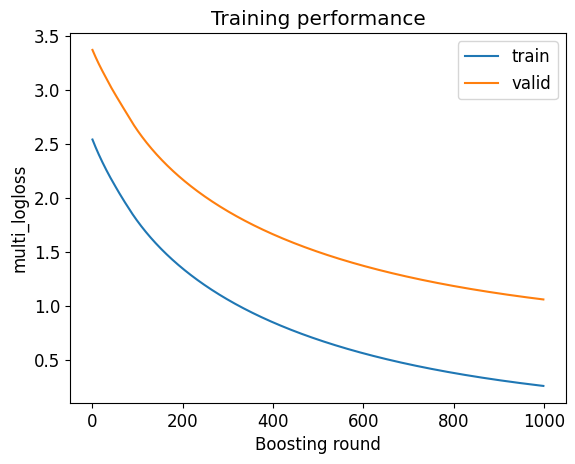

In [18]:
# 学習過程の可視化
plt.rcParams["font.size"] = 12
plt.plot(evaluation_results['train']['multi_logloss'], label='train')
plt.plot(evaluation_results['valid']['multi_logloss'], label='valid')
plt.ylabel('multi_logloss')
plt.xlabel('Boosting round')
plt.title('Training performance')
plt.legend()
plt.show()

In [19]:
# ワンホットベクトル化しているのでテストのほうではカラムがないやつもあり数がずれるのでこの引数が必要。
y_pred = gbm.predict(test_total)
y_pred = pd.DataFrame(y_pred)
y_pred_submit = y_pred.idxmax(axis=1)

In [20]:
# 検証データを推論
y_pred_train = gbm.predict(X_valid)
y_pred_train = pd.DataFrame(y_pred_train)
print(y_pred_train.head())
print(y_pred_train[0])

             0         1         2         3         4         5         6    
0  6.220841e-16  0.023064  0.015215  0.019191  0.023011  0.028087  0.013884  \
1  6.705537e-16  0.024833  0.016404  0.020651  0.024837  0.030177  0.014962   
2  7.254021e-16  0.026870  0.017743  0.022352  0.026858  0.032720  0.016190   
3  6.891213e-16  0.025513  0.016860  0.021238  0.025485  0.031041  0.015377   
4  2.536402e-15  0.093790  0.062080  0.078112  0.093983  0.114247  0.056628   

         7         8         9         10        11        12        13   
0  0.023064  0.017881  0.775403  0.007062  0.011187  0.007061  0.011182  \
1  0.024832  0.019243  0.026196  0.007607  0.763964  0.007612  0.012053   
2  0.026860  0.020831  0.028355  0.008234  0.013039  0.739235  0.013045   
3  0.025492  0.019775  0.026867  0.007821  0.012385  0.014833  0.750994   
4  0.093948  0.072714  0.098944  0.028786  0.045581  0.028770  0.045615   

         14        15            16            17            18  
0  0.021

In [21]:
y_pred_int = y_pred_train.idxmax(axis=1)
# y_pred_int = np.argmax(y_pred_train.values, axis=1)
# y_pred_int = y_pred_train.astype(int)
y_pred_int

0      9
1     11
2     12
3     13
4      5
5      8
6     12
7      2
8      2
9      7
10    13
11    11
12     5
13     4
14     1
15     5
16     9
17     1
18     1
19    10
20     9
21     3
22     7
23     7
24     5
25     6
26     4
27    12
28     9
29     5
30     6
31    13
32     3
33     2
34     1
35     1
36     9
37     8
38    11
39     3
40    10
41     6
dtype: int64

In [23]:
# yvalidのラベルの配列をy_pred_trainから取得して正解のラベルの予測確率値を取得
y_pred_correct = []
for i, y_val in enumerate(y_valid):
    # 行指定で各確率値を取得
    y_pred = y_pred_train.iloc[i]
    y_probability = y_pred[y_val]
    y_pred_correct.append(y_probability)

# ラベル無視して最大確率のみを抽出した配列。
y_pred_correct

# ラベルごとの確率値を取得
# 0~10のラベルごとの確率値を取得
y_pred_categorical = [[] for _ in range(19)]
for i, y_val in enumerate(y_valid):
    # 行指定で各確率値を取得
    y_pred = y_pred_train.iloc[i]
    y_probability = y_pred[y_val]
    y_pred_categorical[y_val].append(y_probability)

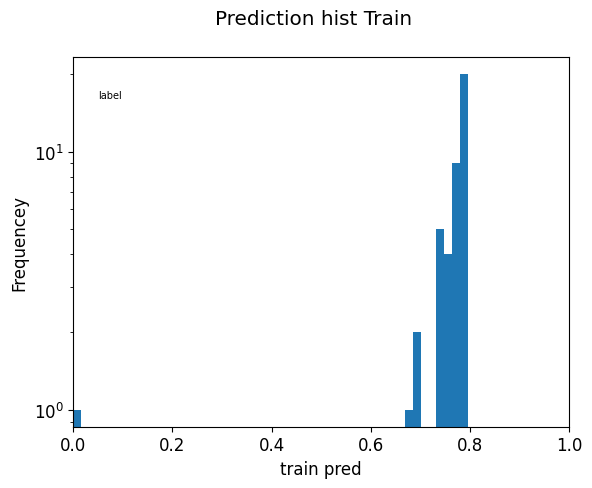

In [24]:
# 正解ラベルの確率値のヒストグラム作成
f, (ax) = plt.subplots()
f.suptitle('Prediction hist Train')

bins = 50

ax.hist(y_pred_correct, bins = bins)

plt.xlabel('train pred')
plt.ylabel('Frequencey')
plt.xlim((0, 1))
plt.yscale('log')
plt.text(0.05, 0.89, 'label',transform = ax.transAxes, fontsize = 7)
plt.show();

# 確率が低い（つまり他のジャンルと分類される）ものが多い。理想は左画はほぼなくて、右に寄ったグラフが作成できること。

/tmp/ipykernel_6431/2709819233.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


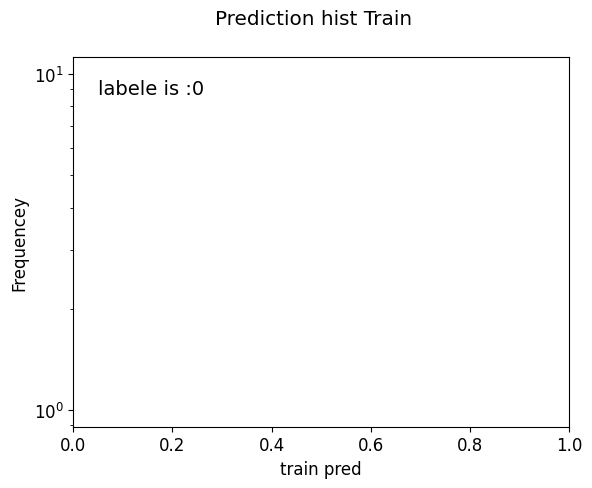

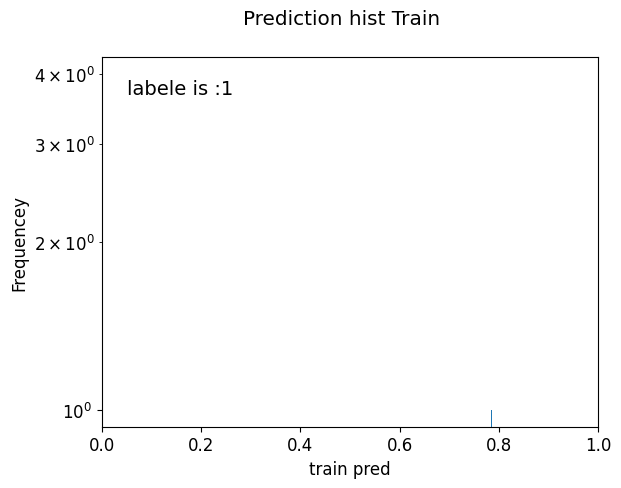

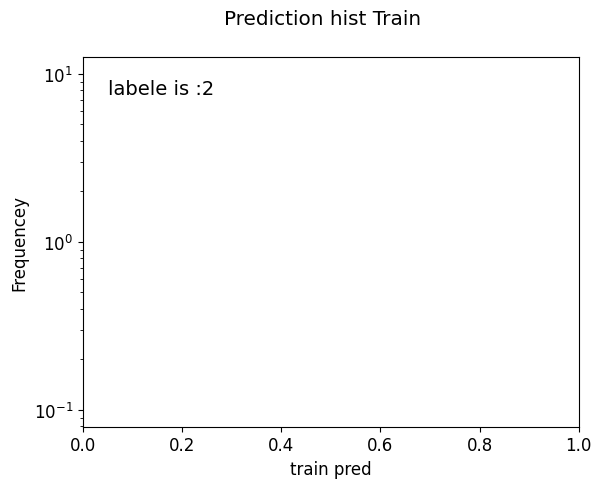

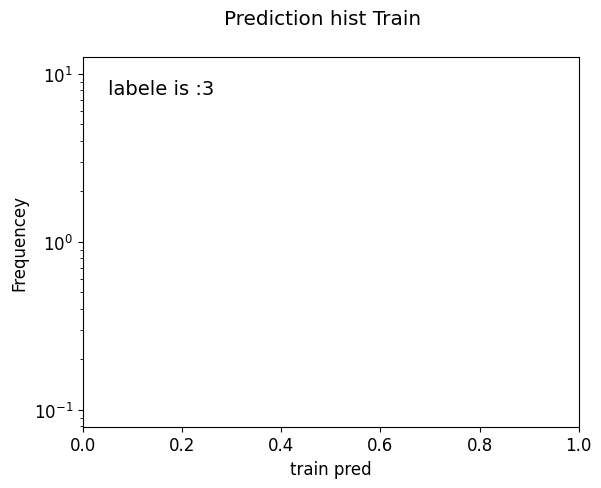

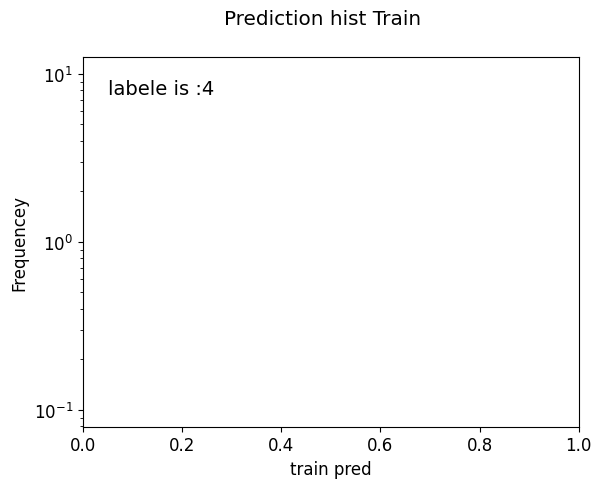

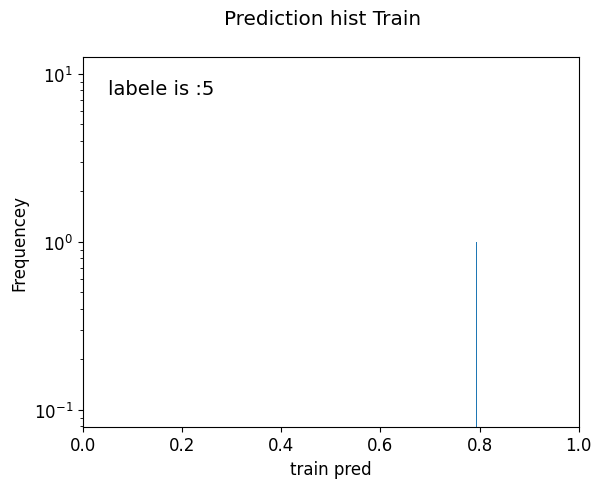

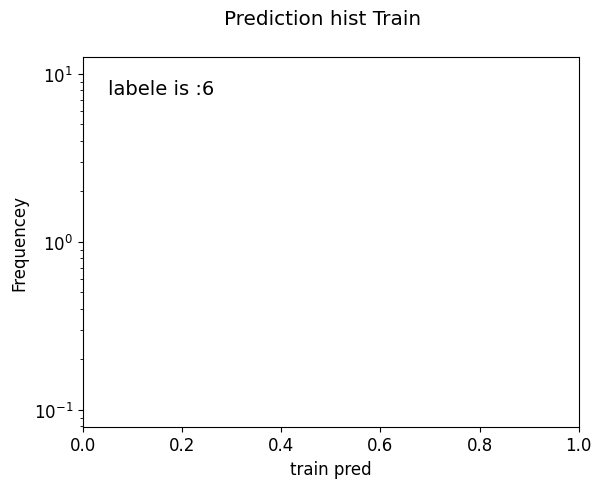

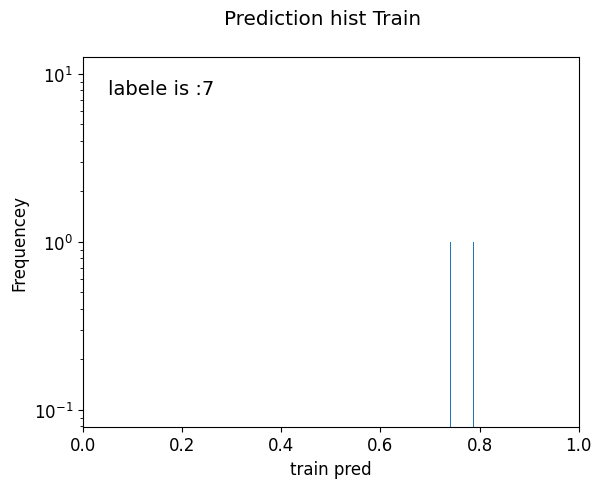

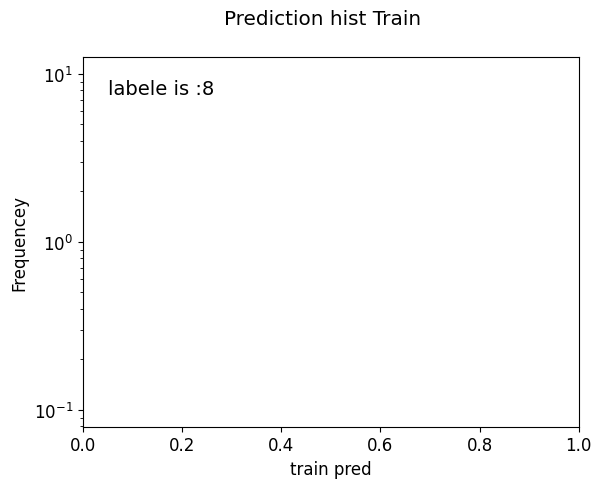

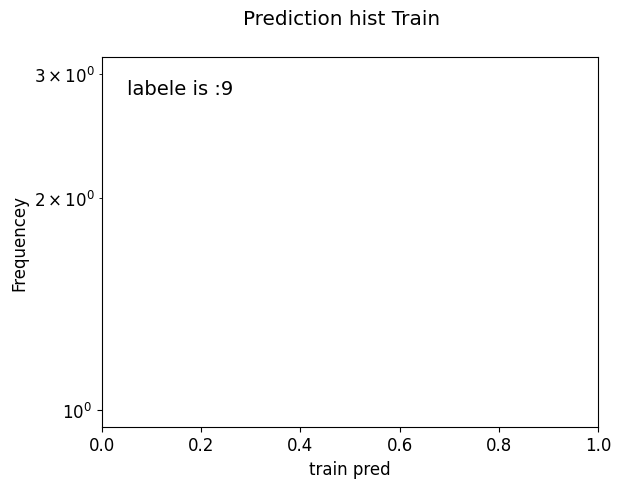

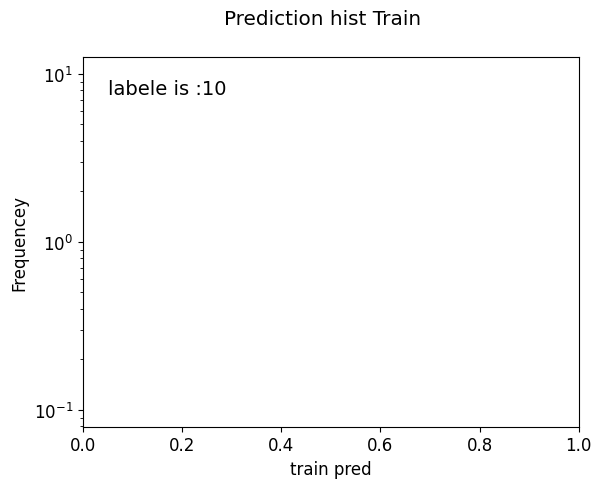

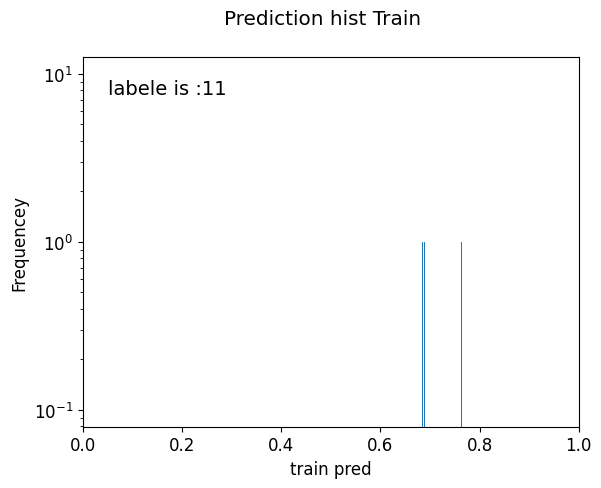

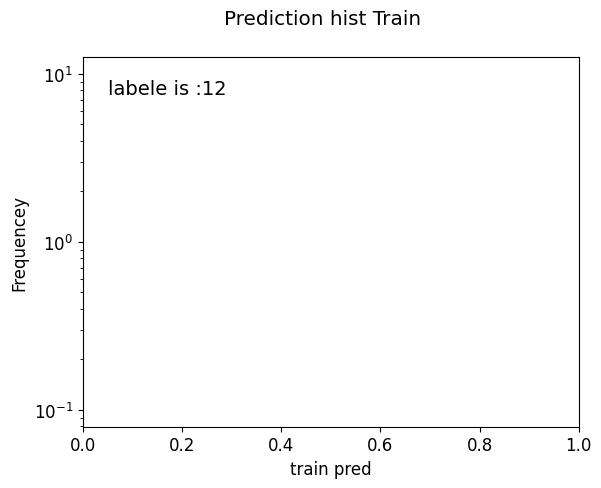

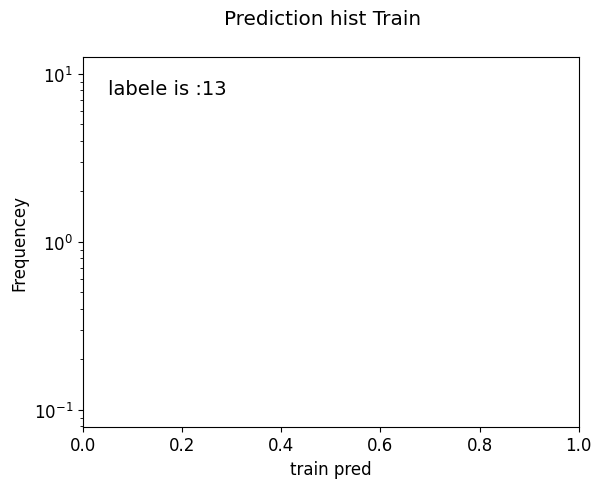

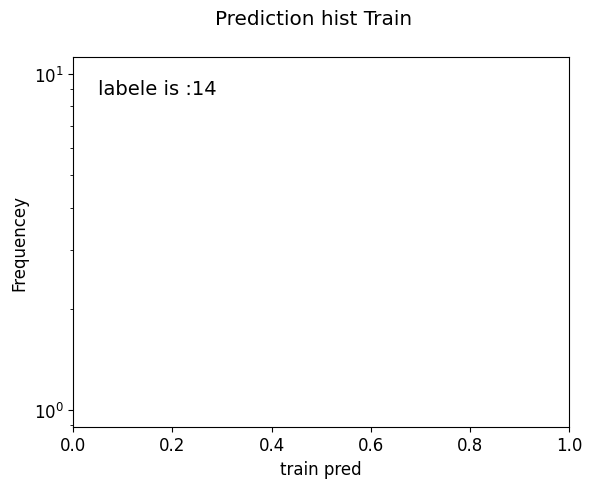

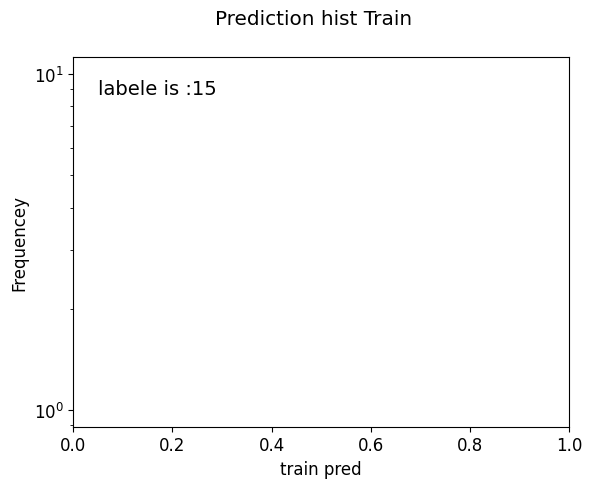

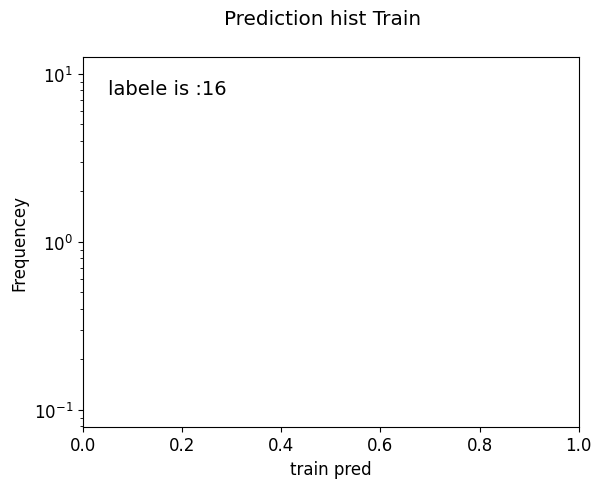

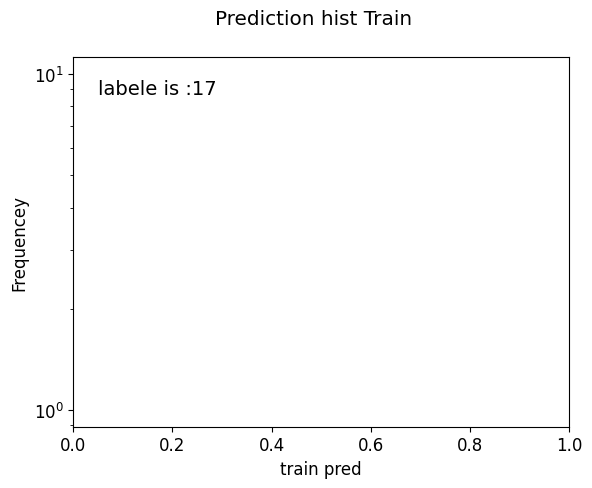

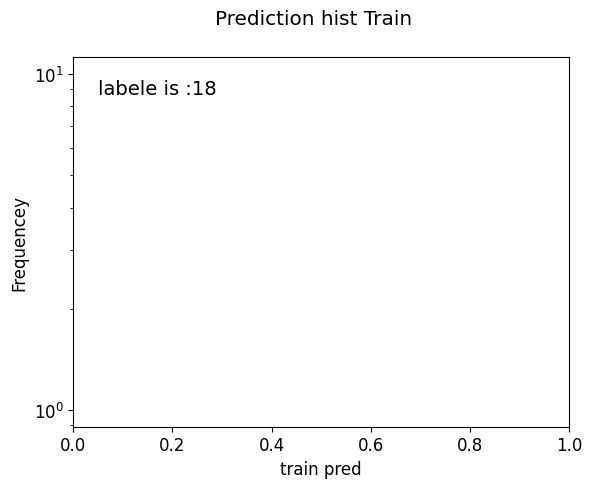

In [26]:
for i, y_pred_category in enumerate(y_pred_categorical):
    f, (ax) = plt.subplots()
    f.suptitle('Prediction hist Train')

    bins = 50

    ax.hist(y_pred_category, bins = bins)

    plt.xlabel('train pred')
    plt.ylabel('Frequencey')
    plt.xlim((0, 1))
    plt.yscale('log')
    plt.text(0.05, 0.9, 'labele is :{}'.format(i),transform = ax.transAxes, fontsize = 14)
    plt.show();

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

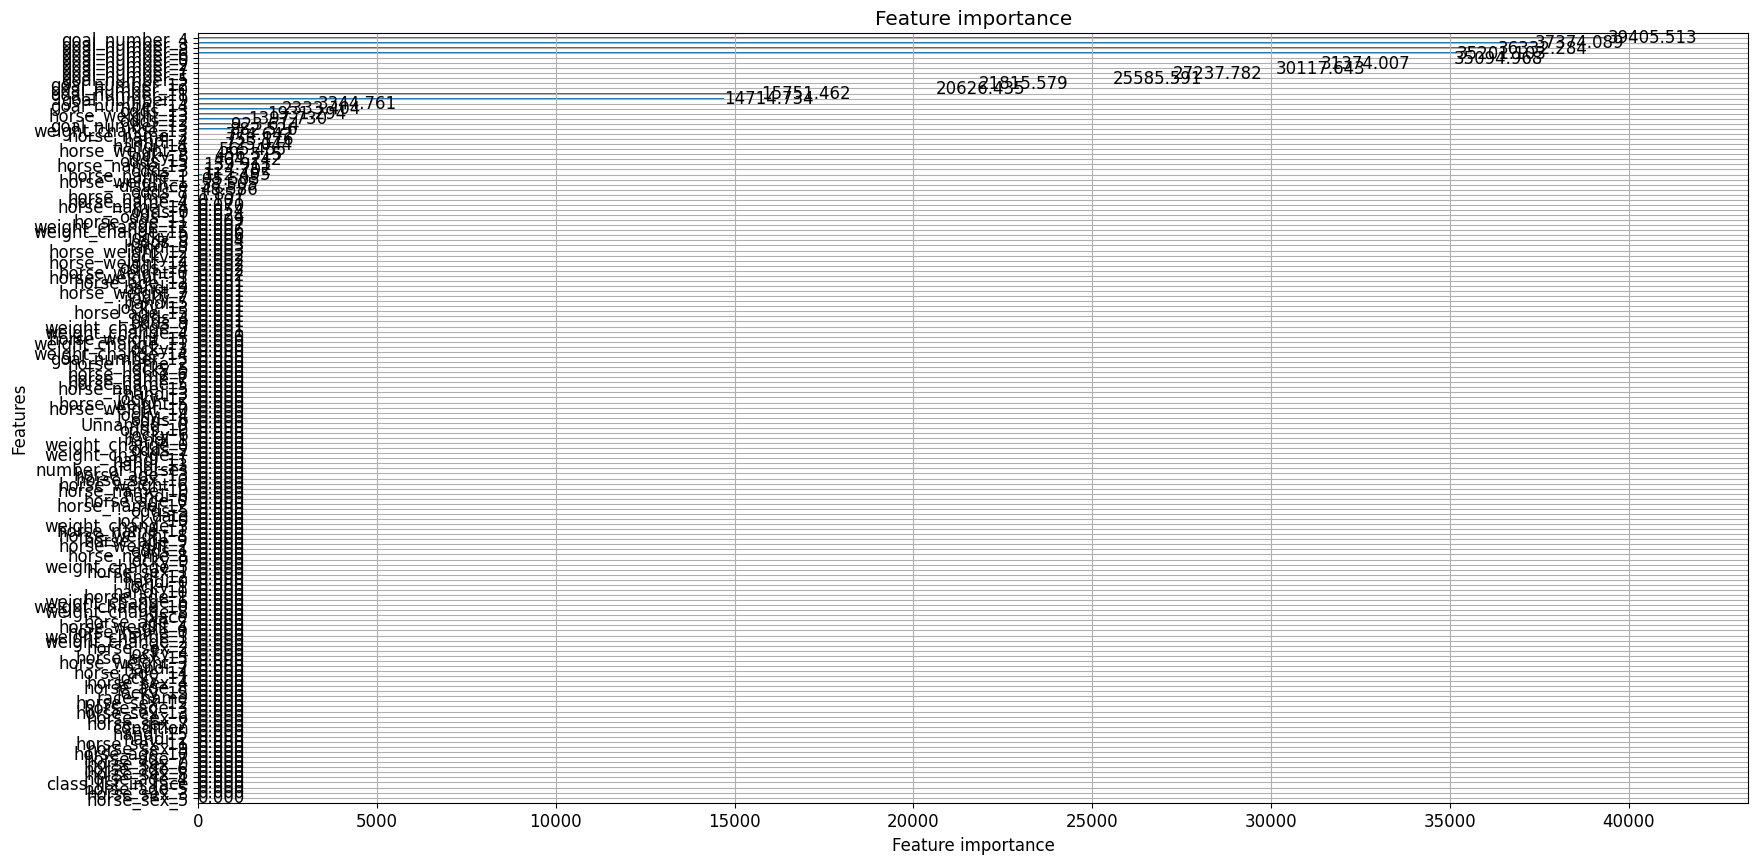

In [27]:
# 4. feature importanceが確認できる
# 特徴点（特徴量）の寄与率を明示化する。特徴点抽出
# 学習後、以下のURLを参考に寄与率を算出させてみる。
# https://qiita.com/ku_a_i/items/74241c84cda8c7327277
lgb.plot_importance(gbm, figsize=(20,10),importance_type='gain')

f1_score=0.9761904761904762


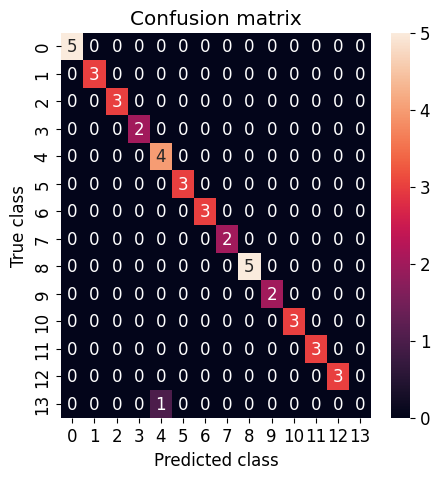

In [30]:
import os
import datetime
from sklearn import metrics
Dicision_threshould = 0.5

path = "result/" 
now = datetime.datetime.now()
filename = path + now.strftime('%Y%m%d_%H%M%S') + "_"+ "LightGBM"+ "_" + str(Dicision_threshould)+ '.png'


if not os.path.isdir(path):
   os.mkdir(path)


# スコア(RMSE)算出
# y_pred_int = np.where(y_pred_train > Dicision_threshould, 1, 0)
y_pred_int = y_pred_train.idxmax(axis=1)

f1_score = metrics.f1_score(y_true=y_valid, y_pred=y_pred_int, average="micro")
print(f'f1_score={f1_score}')

# 0から18までのリストを作成
genre_data = pd.DataFrame(list(range(19)))

import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
   roc_curve, recall_score, classification_report, f1_score,
   precision_recall_fscore_support)
conf_matrix = confusion_matrix(y_valid, y_pred_int)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.savefig(filename)
plt.show()

f1_score=0.9761904761904762


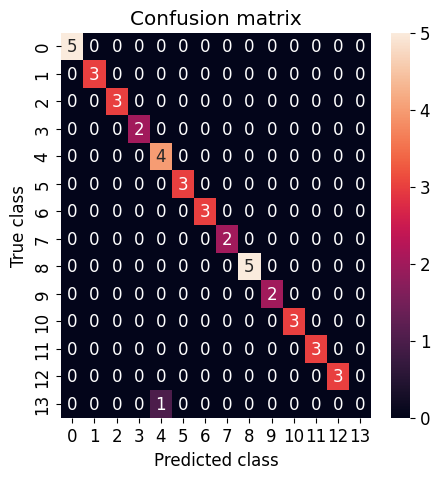

NameError: name 'test_id' is not defined

In [33]:
import os
import datetime
from sklearn import metrics

Dicision_threshould = 0.7

path = "result/" 
now = datetime.datetime.now()
filename = path + now.strftime('%Y%m%d_%H%M%S') + "_"+ "Ansamble"+ "_" + str(Dicision_threshould)+ '.png'

# y_pred_train_ansamble = (y_pred_train_rf + y_pred_train) / 2.0


# スコア(RMSE)算出

# y_pred_train_ansamble = y_pred_int * 0.8 + y_pred_train_rf * 0.2
# y_pred_int = y_pred_train_ansamble.idmax(axis=1)


f1_score = metrics.f1_score(y_true=y_valid, y_pred=y_pred_int, average="micro")
print(f'f1_score={f1_score}')

plt.rcParams["font.size"] = 12

import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
   roc_curve, recall_score, classification_report, f1_score,
   precision_recall_fscore_support)
conf_matrix = confusion_matrix(y_valid, y_pred_int)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.savefig(filename)
plt.show()

# make submission file
submission_pd = pd.concat([test_id, y_pred_int], axis=1)
submission_pd.head()
submission_pd.to_csv("submission_ansamble.csv", index = False, header = False)